In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from sqlalchemy import create_engine
from sshtunnel import SSHTunnelForwarder
import testing
import matplotlib.pyplot as plt
from time import time
import numpy as np
ip = "147.32.83.171"

C:\Users\zdesi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
f = open("txt_files/found_arb.txt")
ids = f.read()
ids = ids.split("\n")
ids = [i for i in ids[:-1]]

ssh_tunnel = SSHTunnelForwarder(
    ip,
        ssh_username='syrovzde',
        ssh_private_key='C:\\Users\\zdesi\\.ssh\\syrovzde_rsa',
        remote_bind_address=('localhost', 5432)
    )
ssh_tunnel.start()
engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='asianodds'
    ))
result_engine = create_engine("postgresql://{user}@{host}:{port}/{db}".format(
        host='localhost',
        port=ssh_tunnel.local_bind_port,
        user='syrovzde',
        db='betexplorer'
    ))
print("completed")


completed


In [15]:
matchids = []
for i in ids:
    if i not in matchids:
        matchids.append(i)

In [16]:
profits,betting_vectors,arb_ids=testing.test(p=1,match_ids=matchids,res_engine=result_engine,engine=engine,weighted=False)


1562868529
1563026767
1563108486
1563032872
1124895
1125355
1069731784
-818990875
1563196446
1563173599
1562944376
1563026806
1563272518
1563076444
1563076041
1563075993
1563076275
1563076246
1563137534
1563278866
1563290671
1563344125
1563327032
1563330733
1563278880
1563278909
1563316090
1563347359
1563309882
1563278997
1563415916
1563212686
1563447847
1563170318
1563459710
1563479791
1563287438
1563298350
1563484566
1563330633
1563330225
1563330402
1563330204
1563330435
1563330392
1563330303
1563567614
1563330411
1563582455
1563548691
1563548349
1563548696
1563567088
1563576622
1563611391
1563610244
1563631135
1563610241
1563631133
1563610237
1563436869
1563673298
1563673296
1563700816
1563714589
1563781645
1564030349
1563972354
1563946046
1563941912
1563861593
1563960777
1563861358
1563821891
1564011560
1564012012
1563861184
1563861055
1563994527
1564034875
1564083301
1563934490
1564039918
1564133487


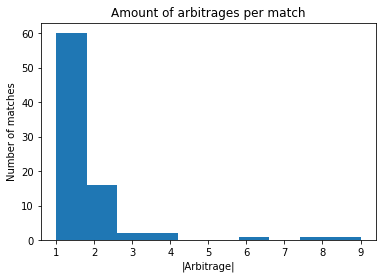

In [17]:



last_arb = 0
hist = []
count = 0
for arb in arb_ids:
    if count == 0:
        count = 1
        last_arb = arb
        continue
    if last_arb == arb:
        count += 1
        last_arb = arb
        continue
    hist.append(count)
    count = 1
    last_arb = arb


plt.hist(hist)
plt.title("Amount of arbitrages per match")
plt.xlabel("|Arbitrage|")
plt.ylabel("Number of matches")
plt.show()


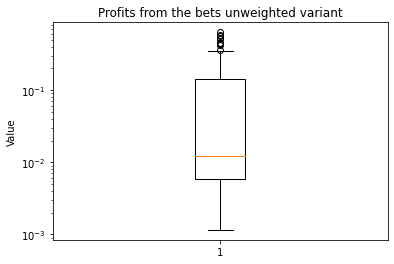

In [18]:
values = []
for i in range(len(profits)):
    values.append(profits[i]/sum(betting_vectors[i]))

plt.boxplot(values)
plt.title("Profits from the bets unweighted variant")
plt.ylabel('Value')
plt.yscale('log')
plt.show()

1562868529
1563026767
1563108486
1563032872
1124895
1125355
1069731784
-818990875
1563196446
1563173599
1562944376
1563026806
1563272518
1563076444
1563076041
1563075993
1563076275
1563076246
1563137534
1563278866
1563290671
1563344125
1563327032
1563330733
1563278880
1563278909
1563316090
1563347359
1563309882
1563278997
1563415916
1563212686
1563447847
1563170318
1563459710
1563479791
1563287438
1563298350
1563484566
1563330633
1563330225
1563330402
1563330204
1563330435
1563330392
1563330303
1563567614
1563330411
1563582455
1563548691
1563548349
1563548696
1563567088
1563576622
1563611391
1563610244
1563631135
1563610241
1563631133
1563610237
1563436869
1563673298
1563673296
1563700816
1563714589
1563781645
1564030349
1563972354
1563946046
1563941912
1563861593
1563960777
1563861358
1563821891
1564011560
1564012012
1563861184
1563861055
1563994527
1564034875
1564083301
1563934490
1564039918
1564133487


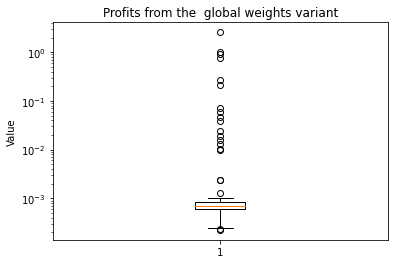

In [19]:
profits_w,betting_vectors_w,arb_ids_w=testing.test(p=1,match_ids=matchids,res_engine=result_engine,engine=engine,weighted=True)

values_w = []
for i in range(len(profits_w)):
    values_w.append(profits_w[i]/sum(betting_vectors_w[i]))

plt.boxplot(values_w)
plt.title("Profits from the  global weights variant")
plt.ylabel('Value')
plt.yscale('log')
plt.show()
#logarithmic scale

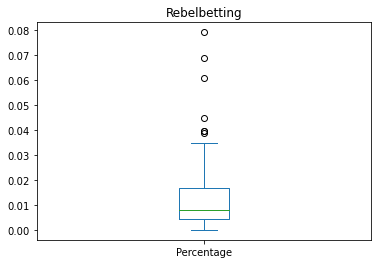

In [22]:
import pandas as pd
df = pd.read_csv("csv_files/RebelBetting.csv")
df = df[df['BetType']== 'Arb']
df["Percentage"].plot.box(title='Rebelbetting')

1562868529
1563026767
1563108486
1563032872
1124895
1125355
1069731784
-818990875
1563196446
1563173599
1562944376
1563026806
1563272518
1563076444
1563076041
1563075993
1563076275
1563076246
1563137534
1563278866
1563290671
1563344125
1563327032
1563330733
1563278880
1563278909
1563316090
1563347359
1563309882
1563278997
1563415916
1563212686
1563447847
1563170318
1563459710
1563479791
1563287438
1563298350
1563484566
1563330633
1563330225
1563330402
1563330204
1563330435
1563330392
1563330303
1563567614
1563330411
1563582455
1563548691
1563548349
1563548696
1563567088
1563576622
1563611391
1563610244
1563631135
1563610241
1563631133
1563610237
1563436869
1563673298
1563673296
1563700816
1563714589
1563781645
1564030349
1563972354
1563946046
1563941912
1563861593
1563960777
1563861358
1563821891
1564011560
1564012012
1563861184
1563861055
1563994527
1564034875
1564083301
1563934490
1564039918
1564133487


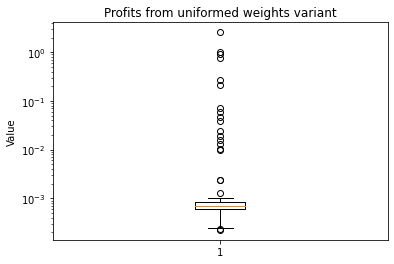

In [23]:
profits_u,betting_vectors_u,arb_ids_u=testing.test(p=1,match_ids=matchids,res_engine=result_engine,engine=engine,weighted=True,uniform_weights=True)

values_u = []
for i in range(len(profits_u)):
    values_u.append(profits_u[i]/sum(betting_vectors_u[i]))

plt.boxplot(values_u)
plt.title("Profits from uniformed weights variant")
plt.ylabel('Value')
plt.yscale('log')
plt.show()
#logarithmic scale

In [24]:
profits_lam,betting_vectors_lam,arb_ids_lam=testing.test(p=1,match_ids=matchids,res_engine=result_engine,engine=engine,weighted=True,lambda_weights=True)

values_lam = []
for i in range(len(profits_lam)):
    values_lam.append(profits_lam[i]/sum(betting_vectors_lam[i]))
values_lam

1562868529
here
1563026767
here
1563108486
here
1563032872
here
1124895
here
1125355
here
1069731784
here
-818990875
here
1563196446
here
1563173599
here
1562944376
here
1563026806
here
1563272518
here
1563076444
here
1563076041
here
1563075993
here
1563076275
here
1563076246
here
1563137534
here
1563278866
here
1563290671
here
1563344125
here
1563327032
here
1563330733
here
1563278880
here
1563278909
here
1563316090
here
1563347359
here
1563309882
here
1563278997
here
1563415916
here
1563212686
here
1563447847
here
1563170318
here
1563459710
here
1563479791
here
1563287438
here
1563298350
here
1563484566
here
1563330633
here
1563330225
here
1563330402
here
1563330204
here
1563330435
here
1563330392
here
1563330303
here
1563567614
here
1563330411
here
1563582455
here
1563548691
here
1563548349
here
1563548696
here
1563567088
here
1563576622
here
1563611391
here
1563610244
here
1563631135
here
1563610241
here
1563631133
here
1563610237
here
1563436869
here
1563673298
here
1563673296
her

[0.0006605019815059645,
 0.0007001405434068038,
 0.0006645743806388576,
 0.0008147131601482445,
 0.0007483629560335914,
 0.0005905000354300021,
 0.0007351589781290203,
 0.00035932446999640676,
 0.000721240533717995,
 0.0005929439667951378,
 0.0007281465030765018,
 0.0005136766405547287,
 0.0007542900245144258,
 0.0007668711656441718,
 0.0006931207762952695,
 0.000683526999316473,
 0.0006985679357318294,
 0.0006734759575817999,
 0.00970876433695693,
 0.0024186096874322517,
 0.0007549420393249308,
 0.0007388252678241596,
 0.0007020466126918288,
 0.0382225626565721,
 0.00033647375504706806,
 0.0006738544474393076,
 0.0007889857588069638,
 0.0005467468562056094,
 0.0008499606893181189,
 0.0008550772348512137,
 0.00023577864352312792,
 0.0003354579000335458,
 0.0006949270326615718,
 0.0009037035028105053,
 0.0009211134063998465,
 0.000648974290234518,
 0.019487124516602235,
 0.0023773373918977883,
 0.0006612860028898241,
 0.0006771353561609616,
 0.0007173967082855161,
 0.0002822698377580612

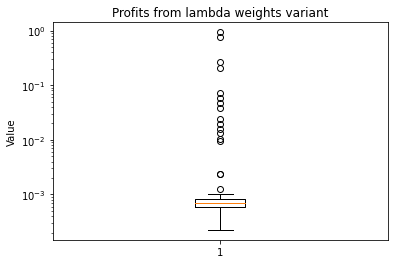

In [25]:
values_lam = np.array(values_lam)
tmp = values_lam[values_lam <1]
plt.boxplot(tmp)
plt.title("Profits from lambda weights variant")
plt.ylabel('Value')
plt.yscale('log')
plt.show()